<a href="https://colab.research.google.com/github/juanosalvador/Optimal-Value-for-epsilon-DBSCAN/blob/main/Hiperparameter_Tunning_The_Optimal_Value_For_Epsilon_(EPS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Librerías de cálculo, manipulación y tratamiento de datos
import pandas as pd
import numpy as np
## Librerías de visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
#sklearn
#from sklearn import cluster, datasets, mixture
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
## sklearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

sns.set()

Hi there! In this entries we calculate the optimal value for epsilon using a heuristic method. The method that we use is KNN in order to select the avegare distance of a k neigbohrs. We try with difference value for K.

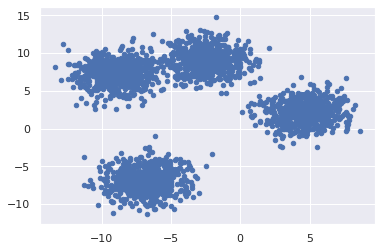

In [2]:
## Load synthetic date
# blobs with varied variances
n_samples = 2500
n_features = 2
n_clusters = 4
random_state = 42
#max_iter = 100

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  cluster_std=1.5,
                  centers=n_clusters, 
                  random_state=random_state)
plt.scatter(X[:,0],X[:,1], s = 20)
plt.show()

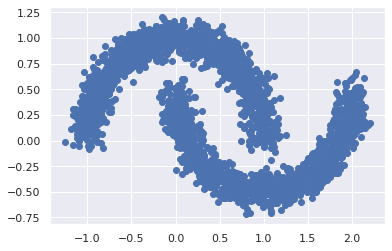

In [3]:
## make moon
Xm, ym = make_moons(2500, noise=0.09, random_state=0)
plt.scatter(Xm[:,0], Xm[:,1])
plt.show()

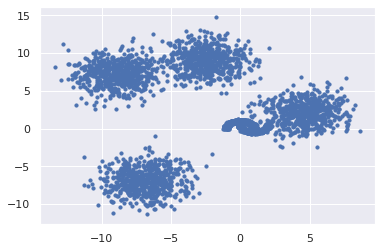

In [4]:
## Concatenate numpy arrays
X = np.concatenate((X,Xm),axis = 0)
plt.scatter(X[:,0], X[:,1], s = 10)

In [5]:
################## DBSCAN######################
# Escalamos los datos
X_scaled = StandardScaler().fit_transform(X)


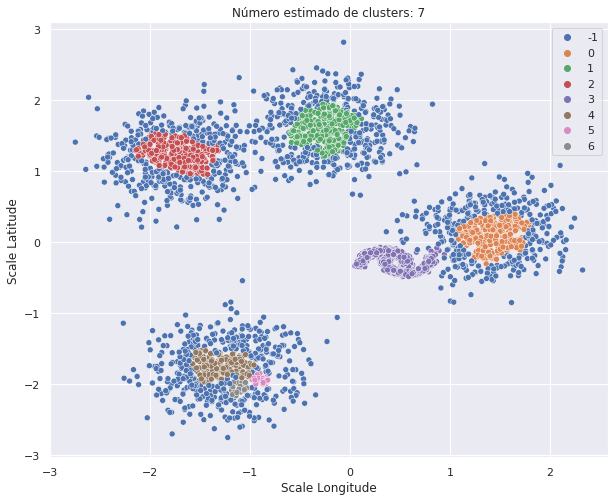

In [37]:
"""Datos Escalados"""
# Entrada de datos
eps = 0.09
min_samples = 20
#
db = DBSCAN(eps= eps, min_samples=min_samples).fit(X_scaled)
labels = db.labels_

### Visualización
fig = plt.figure(figsize=(10, 8))
#sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=["cluster-{}".format(x) for x in labels])
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=labels,  palette='deep')
plt.title('Número estimado de clusters: %d' % (len(np.unique(labels))-1))
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')
plt.show()

Estimated number of clusters: 7
Estimated number of noise points: 1444
Silhouette Coefficient: 0.286


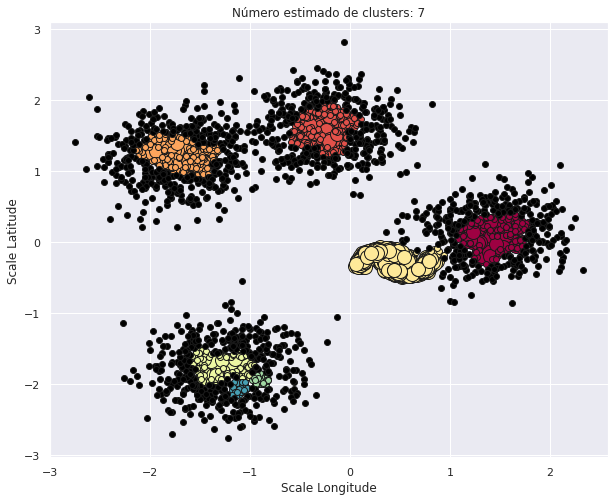

In [38]:
import numpy as np
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
plt.figure(figsize=(10,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')

from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))
plt.show() 

# Tunning epsilon
[paper](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)<br>
[explicación del método](https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/)

In [93]:
from sklearn.neighbors import NearestNeighbors

In [94]:
k = 22 ## vecinos más cercanos
#epsilon = 0.09 ## anterior
neigh = NearestNeighbors(n_neighbors= k, metric='euclidean')
nbrs = neigh.fit(X_scaled)
distances1, indices = nbrs.kneighbors(X_scaled)

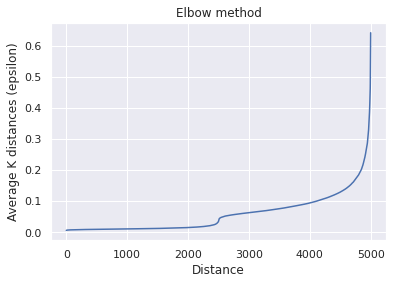

In [106]:
neigh = NearestNeighbors(n_neighbors= k, metric='euclidean')
nbrs = neigh.fit(X_scaled)
distances1, indices = nbrs.kneighbors(X_scaled)
distances1 = np.sort(distances1, axis=0)
### probando
distance_matrix, index = nbrs.kneighbors(X_scaled)
distance_matrix_sort = np.sort(distance_matrix, axis = 0)
## Obentenemos la media de la matriz de distancias, dejamos fuera el primer vecino ya que es el mismo punto
distances1 = distances1[:,1:].mean(1)
plt.plot(distances1)
plt.title("Elbow method")
plt.xlabel("Distance")
plt.ylabel("Average K distances (epsilon)")
plt.show()

In [105]:
pd.DataFrame(distance_matrix[:,1:]) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.041518,0.047601,0.077493,0.085131,0.098786,0.144363,0.160349,0.165478,0.174210,0.176255,0.179174,0.194107,0.200733,0.203646,0.204379,0.217697,0.233750,0.234569,0.246854,0.248285,0.252229
1,0.045090,0.054327,0.055169,0.062329,0.064972,0.074028,0.081563,0.082052,0.083659,0.090711,0.095662,0.099066,0.104673,0.108266,0.113079,0.114439,0.115414,0.122256,0.122621,0.129143,0.131276
2,0.024101,0.026853,0.035113,0.047455,0.057608,0.057999,0.063204,0.063610,0.065829,0.071799,0.072840,0.073119,0.073738,0.076364,0.077250,0.083981,0.084308,0.084433,0.085874,0.086589,0.089931
3,0.066226,0.083626,0.095194,0.142553,0.189775,0.190521,0.219651,0.230863,0.245885,0.267361,0.288953,0.307180,0.312684,0.315161,0.321169,0.324079,0.356824,0.356847,0.360924,0.363861,0.374350
4,0.021615,0.025943,0.030665,0.063784,0.078345,0.100528,0.105773,0.109097,0.110776,0.112263,0.115116,0.118254,0.118720,0.130187,0.136364,0.143090,0.147095,0.155618,0.163093,0.165750,0.172778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.002604,0.005009,0.005027,0.005477,0.005647,0.006180,0.006965,0.009339,0.010501,0.011953,0.012324,0.014433,0.014844,0.014848,0.015823,0.015947,0.016031,0.016630,0.016967,0.017377,0.017731
4996,0.002368,0.003524,0.004095,0.005572,0.005639,0.008148,0.008976,0.010016,0.010055,0.010326,0.010598,0.010734,0.011309,0.011939,0.012782,0.013822,0.013926,0.014613,0.014973,0.016190,0.016252
4997,0.006539,0.007869,0.008177,0.008469,0.008704,0.009524,0.010019,0.010397,0.010507,0.011042,0.011741,0.011840,0.011994,0.012636,0.012783,0.013388,0.013556,0.013716,0.015041,0.015217,0.015498
4998,0.001773,0.001831,0.004104,0.005881,0.005908,0.007561,0.008325,0.008918,0.009235,0.009899,0.010154,0.013147,0.013345,0.013767,0.015298,0.015440,0.016413,0.016490,0.017070,0.017528,0.017742


In [103]:
df_matriz = pd.DataFrame(distance_matrix[:,1:]) 

In [104]:
df_matriz.min(1)

0       0.041518
1       0.045090
2       0.024101
3       0.066226
4       0.021615
          ...   
4995    0.002604
4996    0.002368
4997    0.006539
4998    0.001773
4999    0.003388
Length: 5000, dtype: float64

# Encontrando el punto en el codo
[Libreria Kneed](https://pypi.org/project/kneed/)<br>
[Otras formas de calcular el codo](https://stackoverflow.com/questions/43160240/how-to-plot-a-k-distance-graph-in-python)

In [85]:
#!pip install kneed

The value for the optimal epsilon is in:  4543


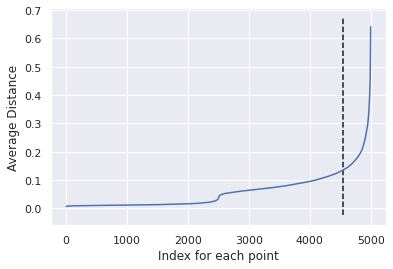

In [86]:
from kneed import KneeLocator
kn = KneeLocator(range(1, len(distances1)+1) ,distances1,  curve='convex', direction='increasing')
print('The value for the optimal epsilon is in: ', kn.knee)
import matplotlib.pyplot as plt
plt.xlabel('Index for each point')
plt.ylabel('Average Distance')
plt.plot(range(1, len(distances1)+1), distances1)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [87]:
distancia = kn.knee
epsilon = distances1[distancia]
epsilon 

0.1339196820987218

In [88]:
 #### DBSCAN Datos Escalados###
 ##DBSCAN
#k = 20 ## vecinos más cercanos
#epsilon = 0.09 ## anterior
db = DBSCAN(eps= epsilon, metric='euclidean', min_samples= k).fit(X_scaled)
labels = db.labels_

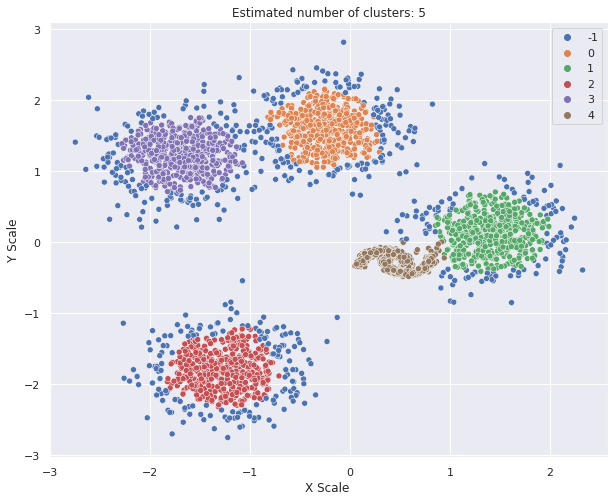

Estimated number of clusters: 5
Estimated number of noise points: 589
Silhouette Coefficient: 0.549


In [90]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=labels,  palette='deep')
plt.title('Estimated number of clusters: %d' % (len(np.unique(labels))-1) )
plt.xlabel('X Scale ')
plt.ylabel('Y Scale')
plt.show()
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_ )
print('Estimated number of noise points: %d' % n_noise_ )
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))

In [80]:
np.unique(labels, return_counts= True)

(array([-1,  0,  1,  2,  3]), array([ 589,  459, 3012,  461,  479]))

Estimated number of clusters: 5
Estimated number of noise points: 589
Silhouette Coefficient: 0.549


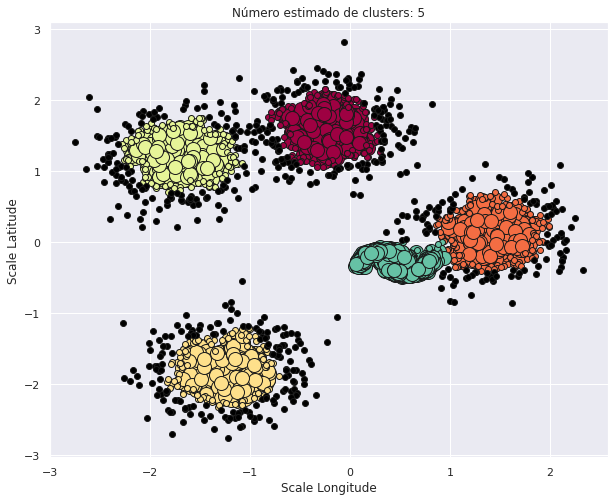

In [91]:
import numpy as np
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
plt.figure(figsize=(10,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')

from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))
plt.show() 

# How to find the optimal value of K in KNN?